In [ ]:
using PyCall,PyPlot  #用python的包实现gif
Snap = pyimport("celluloid")

In [ ]:
const b=collect(pdf(Truncated(Normal(0, 5), -5, 5),-10:0.01:10))

mutable struct wave_function{T<: AbstractFloat}      #
    wave_calculator::Vector{T}
end


In [ ]:
Wave = wave_function(b)

In [ ]:
Wave = wave_function([1.0])

In [ ]:
Wave

In [ ]:
module MyFunction
export foo,foo_1

function foo()
    return 1
end

function foo_1()
    return foo_2()+1
end

function foo_2()
    return 2
end

end


In [ ]:
import .MyFunction.foo_1

In [ ]:
foo_1()

In [ ]:
module Bar
    export foo
    x = 1
    foo()=x
    foo_1()=x+1
end

# Warning:如果使用using的话就不需要使用Bar.foo来得到函数,using会将Module所有export的东西都导入到Main中,无需像import使用Main.Module.??来将某个变量导入,或者直接import模块之后,还需要用Module.??来获取某个变量

In [ ]:

fig = figure()
shoot = Snap.Camera(fig)
Animi = shoot.animate()
@show typeof(Animi)
for i in 1:1000
plot(1:0.01:10,sin.(0.1*i .+ (1:0.01:10)),color="darkslateGrey")
shoot.snap()
end

Animi = shoot.animate()
Animi.save("moleculer.gif",writer="pillow")
show()

In [ ]:
Base.@kwdef mutable struct visualization         #用来可视化的参数,这里因为只有在这里用到,干脆就直接定义在这里了,其它计算部分导入
    Canvas:: Figure = figure()                   #该部分会比较浪费时间了,而且对于包引用也比较方便一些,如果定义在Varible_initial里还需要在其中引入
    shoot:: PyObject = Snap.Camera(Canvas)       #上面的三个包的导入也很麻烦
    Animi:: PyObject = shoot.animate()
end

fig = visualization()

for i in 1:10
    plot(1:0.01:10,sin.(0.1*i .+ (1:0.01:10)),color="darkslateGrey")
    fig.shoot.snap()
end

fig.Animi = fig.shoot.animate()
fig.Animi.save("moleculer.gif",writer="pillow")

In [ ]:
function foo()
    A =1
    B =A
end
foo()

In [ ]:
include("Potential.jl"); using .TD_resolution

println(dump(Main.TD_resolution.Mystruct.Parameter))
println(dump(Main.Mystruct.Parameter))
dump(Parameter)


In [ ]:
println(dump(Main.TD_resolution.Mystruct.Parameter))
println(dump(Main.Mystruct.Parameter))
dump(Parameter)

In [ ]:
struct what
    x::Int64
end
dump(what)

In [ ]:
module foo

export x

x =1
b =2

module foo_2
using ..foo
a = x + 1
end
end


In [ ]:
Main.foo.foo_2.a

In [ ]:
module foo

export foo_1, foo_2



module what

    export foo_1

    using ..foo.what_2
    foo_2()

    function foo_1()
        return 1+foo_2()
    end
end

module what_2
    export foo_2

    function foo_2()
        return 2
    end

end


using .what_2
using .what

end

In [ ]:
using .foo

In [ ]:
foo_1()

In [ ]:
include("Varible_initial.jl")

In [ ]:
    Base.@kwdef mutable struct wave_function{T<: AbstractFloat}      #用来计算迭代的参数
        real_space::Vector{Complex{T}} = complex(collect(pdf(Truncated(Normal(0, 5), -5, 5), LinRange(-L, L, num))))
        momentum_space::Vector{Complex{T}} = zeros(T,length(real_space))
    end

In [ ]:
using Distributions
L,num = (10.0,2001)
A=wave_function{Float64}()

In [ ]:
include("Varible_initial.jl")
using .Mystruct

In [ ]:
V_Matrix(Parameter(),wave_function())

In [ ]:
T_Matrix(Parameter())

In [ ]:
@timev ans*LinRange(-10,10,2001)

In [ ]:
plot_real(Parameter(),wave_function(),visualization())

In [1]:
include("Varible_initial.jl")
using .Mystruct
using PyPlot

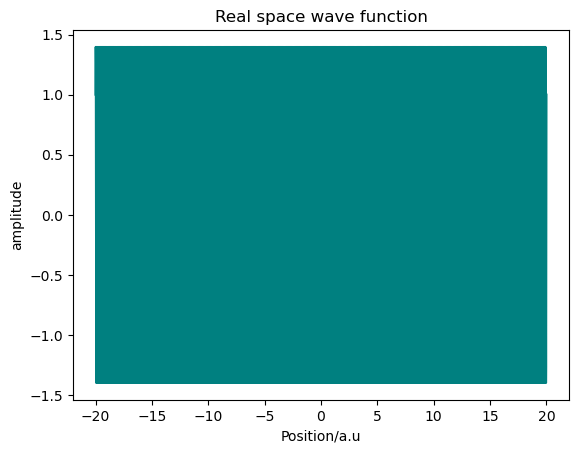

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006D7A62B0>

In [3]:
P = Parameter()
Wave = wave_function()
fig = visualization()
Wave.real_space = cos.(2*pi*10*P.sampling).+sin.(2*pi*10*P.sampling)
positive_fft!(Wave)
subplot(2,1,1)  #这里更改了全局变量figure的样子,所以shoot出来的图会发生变化
plot_real(P, Wave, fig)
subplot(2,1,2)
plot_momentum(P, Wave, fig)


#generate_Animi(fig)


In [1]:
include("Varible_initial.jl")
using .Mystruct


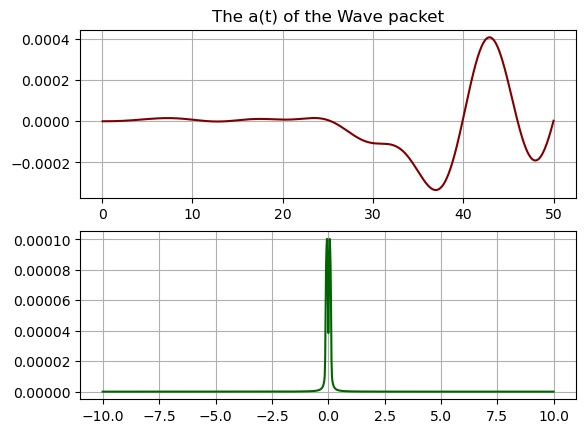

The time is not in real space.


sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [2]:
P = Parameter()
Wave = wave_function()
fig = visualization()

calculation(P, Wave, fig)
plot_HHG()

# PyPlot画多图示例

In [3]:
include("Main_module.jl")
using .Mystruct
plot_HHG()

LoadError: SystemError: opening file "c:\\Users\\86187\\Code\\julia\\Split_operator\\Varible_initial.jl": No such file or directory

In [1]:
include("Main_module.jl")
using .Mystruct

The Energy is ComplexF64[-19.898344392884457 - 3.1252778143198157e-14im, 0.0 + 0.0im]

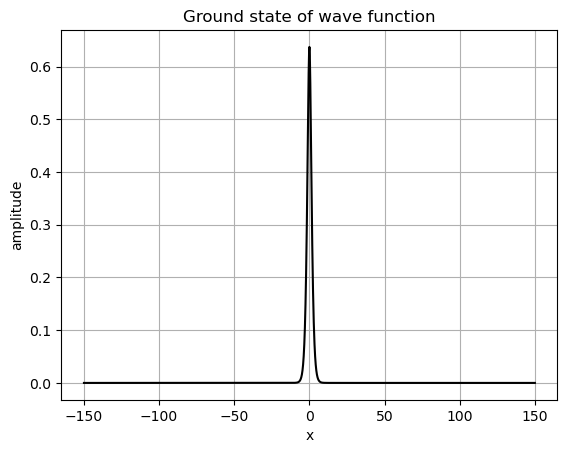


迭代次数:312,虚时间0.0 + 15.600000000000001im


PyObject Text(24.000000000000007, 0.5, 'amplitude')

In [2]:
P = Parameter()
Wave = wave_function()
fig = visualization()

ITR(P, Wave)
plot_Ground()

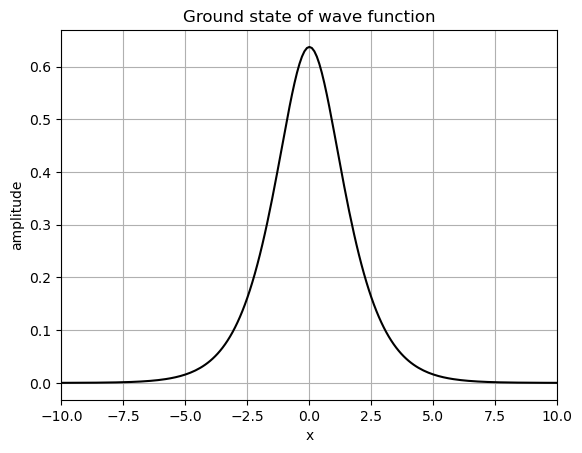

PyObject Text(24.000000000000007, 0.5, 'amplitude')

In [4]:
using PyPlot
xlim(-10,10)
plot_Ground()

The Energy is ComplexF64[-4.986907987065812 - 4.49293380277993e-16im, 2.9103830456733704e-11 + 0.0im]


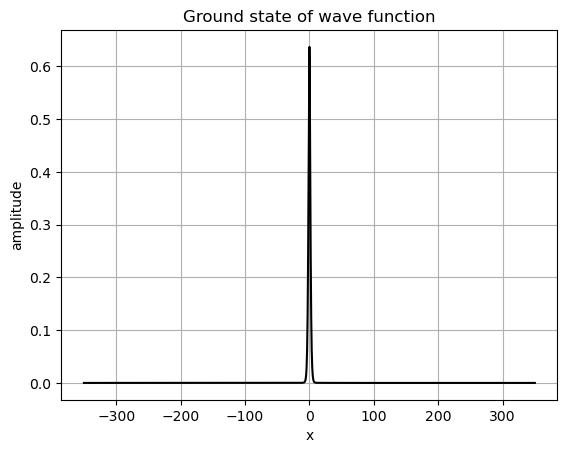

迭代次数:262,虚时间0.0 + 13.100000000000001im


PyObject Text(24.000000000000007, 0.5, 'amplitude')

In [1]:
include("Calculation_Ground.jl")

In [1]:
include("Calculation_HHG.jl")

"Time_evolution_wave_function.csv"

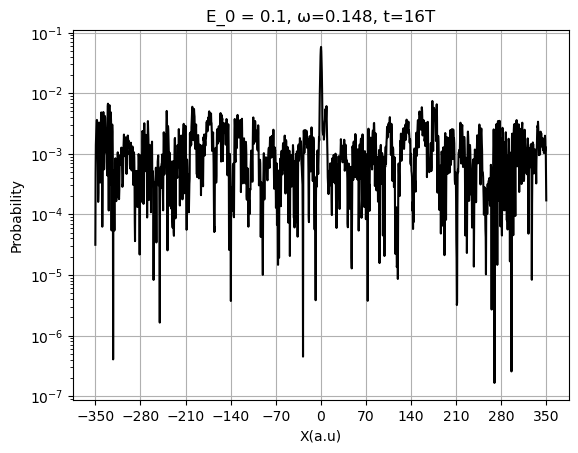

PyObject Text(0.5, 24.0, 'X(a.u)')

In [1]:
include("Main_module.jl")
using .Mystruct
P = Parameter()
plot_probability(P)

In [2]:
using CSV, DataFrames

In [3]:
df = DataFrame(A::Vector{Int64}=[1,2,3],B::Vector{Complex{Float64}}=[1im,2im,3im])


LoadError: syntax: invalid keyword argument name "A::Vector{Int64}" around In[3]:1

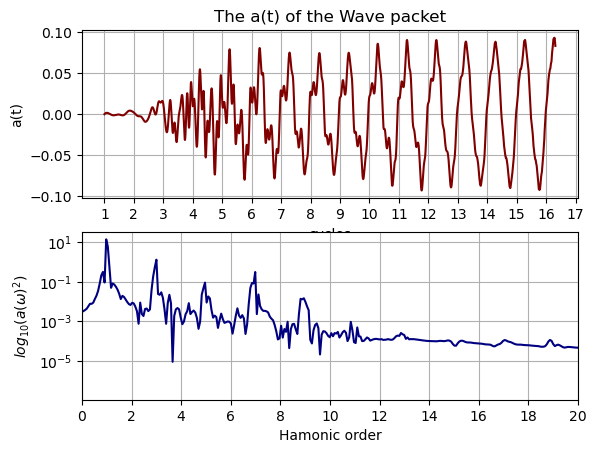

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [1]:
include("Main_module.jl")
using .Mystruct
plot_HHG()

In [1]:
using PyPlot, Calculus
f(x) = 1/(1+x^2)
function high_order(n::Int64)
    if n == 1 
        return differentiate(:(1/(1+x^2)), :x)
    end

    return differentiate(high_order(n-1), :x)
end

# high_order(11)

high_order (generic function with 1 method)

In [2]:
differentiate(:(1/(1+x^2)), :x)

:((-(2 * 1 * x ^ (2 - 1)) * 1) / (1 + x ^ 2) ^ 2)

In [2]:
high_order(1)

:((-(2 * 1 * x ^ (2 - 1)) * 1) / (1 + x ^ 2) ^ 2)

In [3]:
high_order(2)

:(((-((0 * 1 * x ^ (2 - 1) + 2 * 0 * x ^ (2 - 1) + 2 * 1 * ((2 - 1) * 1 * x ^ ((2 - 1) - 1)))) * 1 + -(2 * 1 * x ^ (2 - 1)) * 0) * (1 + x ^ 2) ^ 2 - (-(2 * 1 * x ^ (2 - 1)) * 1) * (2 * (2 * 1 * x ^ (2 - 1)) * (1 + x ^ 2) ^ (2 - 1))) / ((1 + x ^ 2) ^ 2) ^ 2)

In [2]:
high_order(

:((((((-(((0 * 1 * x ^ (2 - 1) + 0 * 0 * x ^ (2 - 1) + 0 * 1 * ((2 - 1) * 1 * x ^ ((2 - 1) - 1))) + (0 * 0 * x ^ (2 - 1) + 2 * 0 * x ^ (2 - 1) + 2 * 0 * ((2 - 1) * 1 * x ^ ((2 - 1) - 1))) + (0 * 1 * ((2 - 1) * 1 * x ^ ((2 - 1) - 1)) + 2 * 0 * ((2 - 1) * 1 * x ^ ((2 - 1) - 1)) + 2 * 1 * (0 * 1 * x ^ ((2 - 1) - 1) + (2 - 1) * 0 * x ^ ((2 - 1) - 1) + (2 - 1) * 1 * (((2 - 1) - 1) * 1 * x ^ (((2 - 1) - 1) - 1)))))) * 1 + -((0 * 1 * x ^ (2 - 1) + 2 * 0 * x ^ (2 - 1) + 2 * 1 * ((2 - 1) * 1 * x ^ ((2 - 1) - 1)))) * 0) + (-((0 * 1 * x ^ (2 - 1) + 2 * 0 * x ^ (2 - 1) + 2 * 1 * ((2 - 1) * 1 * x ^ ((2 - 1) - 1)))) * 0 + -(2 * 1 * x ^ (2 - 1)) * 0)) * (1 + x ^ 2) ^ 2 + (-((0 * 1 * x ^ (2 - 1) + 2 * 0 * x ^ (2 - 1) + 2 * 1 * ((2 - 1) * 1 * x ^ ((2 - 1) - 1)))) * 1 + -(2 * 1 * x ^ (2 - 1)) * 0) * (2 * (2 * 1 * x ^ (2 - 1)) * (1 + x ^ 2) ^ (2 - 1))) - ((-((0 * 1 * x ^ (2 - 1) + 2 * 0 * x ^ (2 - 1) + 2 * 1 * ((2 - 1) * 1 * x ^ ((2 - 1) - 1)))) * 1 + -(2 * 1 * x ^ (2 - 1)) * 0) * (2 * (2 * 1 * x ^ (2 - 